In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM

In [2]:
sublist=['ec105', 'ec106', 'ec107', 'ec108', 'ec109']
# sublist=['ec108']
phase='refresh'
all=pd.DataFrame()
for sub in sublist:
    file='data/' + sub + phase + 'eyebehave.csv'
    print(file)
    eye=pd.read_csv(file, index_col=0)
    all=pd.concat([all,eye])
all.columns

data/ec105refresheyebehave.csv
data/ec106refresheyebehave.csv
data/ec107refresheyebehave.csv
data/ec108refresheyebehave.csv
data/ec109refresheyebehave.csv


Index(['block', 'cond', 'duration', 'end', 'endloc', 'event', 'loc1end',
       'loc1start', 'loc1x', 'loc1y', 'loc2end', 'loc2start', 'loc2x', 'loc2y',
       'loc3end', 'loc3start', 'loc3x', 'loc3y', 'objonset', 'recog loc',
       'recog order', 'refresh order', 'same/diff', 'start', 'startloc',
       'study order', 'sub', 'trialend', 'trialnum', 'xend', 'xstart', 'yend',
       'ystart'],
      dtype='object')

In [29]:
roimask=all['startloc']=='offscreen'
all_roi=all[~roimask]
fix=all_roi[all_roi['event']=='EFIX']
sacc=all_roi[all_roi['event']=='ESACC']

fix=fix[fix['duration']>80]
fix=fix[fix['recog loc']>0]

In [30]:
fix['accuracy'] = fix['recog loc']
fix['accuracy'] = fix['accuracy'].map({1:'Correct', 2:'Incorrect', 3:'Incorrect'})

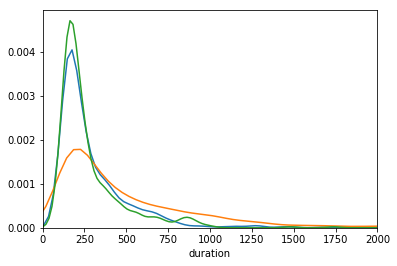

In [31]:
fig, ax = plt.subplots()
ax.set_xlim(0, 2000)
fix = fix[fix['cond']==1]
tmp = fix[['duration', 'startloc']]
sns.distplot(tmp.duration[tmp['startloc']=='loc1start'], hist=False, ax=ax)
sns.distplot(tmp.duration[tmp['startloc']=='loc2start'], hist=False, ax=ax)
sns.distplot(tmp.duration[tmp['startloc']=='loc3start'], hist=False, ax=ax)


In [32]:
rois=['loc1start', 'loc2start', 'loc3start', 'screen']
roi_prop_dict={}
roi_prop_list=[]
for row, ldf in fix.groupby(['sub', 'trialnum', 'cond', 'accuracy']):
    roi_sum = ldf['duration'].sum()
    for roi in rois:
        loc_ldf = ldf[ldf['startloc']==roi]
        loc_dur = loc_ldf['duration'].sum()
        loc_prop = loc_dur/roi_sum
        roi_prop_dict = {'sub':ldf['sub'].iloc[0], 'cond':ldf['cond'].iloc[0], 'trial':ldf['trialnum'].iloc[0], 
                         'accuracy':ldf['accuracy'].iloc[0],
                         'all_roi_dur':roi_sum, 'roi':roi, 'roi_dur':loc_dur, 'roi_prop':loc_prop, 
                         'roi_num':loc_ldf.shape[0]}
        roi_prop_list.append(roi_prop_dict)
roi_fix_tidy=pd.DataFrame(roi_prop_list)
roi_fix_tidy

,accuracy,all_roi_dur,cond,roi,roi_dur,roi_num,roi_prop,sub,trial
0,Correct,1202,1.0,loc1start,0,0,0.000000,ec105,1
1,Correct,1202,1.0,loc2start,0,0,0.000000,ec105,1
2,Correct,1202,1.0,loc3start,0,0,0.000000,ec105,1
3,Correct,1202,1.0,screen,1202,7,1.000000,ec105,1
4,Correct,4714,1.0,loc1start,422,1,0.089521,ec105,6
5,Correct,4714,1.0,loc2start,4292,2,0.910479,ec105,6
6,Correct,4714,1.0,loc3start,0,0,0.000000,ec105,6
7,Correct,4714,1.0,screen,0,0,0.000000,ec105,6
8,Correct,4316,1.0,loc1start,1002,3,0.232159,ec105,10
9,Correct,4316,1.0,loc2start,2340,4,0.542169,ec105,10


In [33]:
sub_fix_list = []
for row, ldf in roi_fix_tidy.groupby(['sub', 'cond', 'roi', 'accuracy']):
    roi_num_mean=ldf['roi_num'].mean()
    roi_dur_mean=ldf['roi_dur'].mean()
    roi_prop_mean=ldf['roi_prop'].mean()
    sub_fix_dict = {'sub':row[0], 'cond':row[1], 'roi':row[2], 'accuracy':row[3],
                   'roi_num_mean':roi_num_mean, 'roi_dur_mean':roi_dur_mean, 'roi_prop_mean':roi_prop_mean}
    sub_fix_list.append(sub_fix_dict)
sub_fix_tidy=pd.DataFrame(sub_fix_list)

In [237]:
fix_df = pd.DataFrame()
tmp = pd.DataFrame()
locs = ['loc1', 'loc2', 'loc3']
acclist = ['Correct', 'Incorrect']
conds = [1,2]
for loc in locs:
    for acc in acclist:
        mask = (sub_fix_tidy['accuracy']==acc) & (sub_fix_tidy['roi']==f'{loc}start')
        tmp = sub_fix_tidy[mask]
        tmp.reset_index(drop=True, inplace=True)
        fix_df[f'mm_{loc}_{acc}_fixnum'] = tmp['roi_num_mean']
        fix_df[f'mm_{loc}_{acc}_fixdur'] = tmp['roi_dur_mean']
        fix_df[f'mm_{loc}_{acc}_prop'] = tmp['roi_prop_mean']
        fix_df['sub'] = tmp['sub']

In [238]:
fix_df

,mm_loc1_Correct_fixnum,mm_loc1_Correct_fixdur,mm_loc1_Correct_prop,sub,mm_loc1_Incorrect_fixnum,mm_loc1_Incorrect_fixdur,mm_loc1_Incorrect_prop,mm_loc2_Correct_fixnum,mm_loc2_Correct_fixdur,mm_loc2_Correct_prop,mm_loc2_Incorrect_fixnum,mm_loc2_Incorrect_fixdur,mm_loc2_Incorrect_prop,mm_loc3_Correct_fixnum,mm_loc3_Correct_fixdur,mm_loc3_Correct_prop,mm_loc3_Incorrect_fixnum,mm_loc3_Incorrect_fixdur,mm_loc3_Incorrect_prop
0,1.666667,825.000000,0.186548,ec105,0.904762,277.904762,0.060667,3.166667,2881.904762,0.688509,3.476190,3962.476190,0.872484,0.428571,171.428571,0.049346,0.666667,236.190476,0.054421
1,1.000000,335.680000,0.076659,ec106,1.307692,554.410256,0.124128,3.640000,3507.920000,0.776216,4.230769,3370.256410,0.749581,0.960000,365.440000,0.082494,0.769231,247.641026,0.056104
2,2.127660,546.553191,0.130936,ec107,1.882353,472.588235,0.111327,5.446809,2446.255319,0.578247,6.117647,2941.176471,0.692994,1.319149,319.106383,0.075949,1.529412,420.352941,0.099296
3,2.562500,772.791667,0.190560,ec108,2.500000,642.625000,0.157248,4.583333,1908.583333,0.458542,4.875000,1966.750000,0.480540,1.708333,529.208333,0.128354,2.125000,620.500000,0.150807
4,3.128205,867.179487,0.205734,ec109,2.320000,562.960000,0.133599,5.205128,1846.615385,0.442202,5.920000,2219.840000,0.526834,2.512821,601.589744,0.142996,2.560000,611.600000,0.144979


In [240]:
locs = ['loc1', 'loc2']
accs = ['Correct', 'Incorrect']
measures = ['fixnum', 'fixdur', 'prop']
fix_diff = pd.DataFrame()
for loc in locs:
    for acc in accs:
        for measure in measures:
            fix_diff[f'{loc}_{acc}_diff_{measure}'] = (fix_df[f'mm_{loc}_{acc}_{measure}']-
                                                       fix_df[f'mm_loc3_{acc}_{measure}'])
            fix_diff['sub'] = fix_df['sub']
fix_diff

,loc1_Correct_diff_fixnum,sub,loc1_Correct_diff_fixdur,loc1_Correct_diff_prop,loc1_Incorrect_diff_fixnum,loc1_Incorrect_diff_fixdur,loc1_Incorrect_diff_prop,loc2_Correct_diff_fixnum,loc2_Correct_diff_fixdur,loc2_Correct_diff_prop,loc2_Incorrect_diff_fixnum,loc2_Incorrect_diff_fixdur,loc2_Incorrect_diff_prop
0,1.238095,ec105,653.571429,0.137202,0.238095,41.714286,0.006247,2.738095,2710.476190,0.639163,2.809524,3726.285714,0.818063
1,0.040000,ec106,-29.760000,-0.005834,0.538462,306.769231,0.068024,2.680000,3142.480000,0.693722,3.461538,3122.615385,0.693477
2,0.808511,ec107,227.446809,0.054987,0.352941,52.235294,0.012030,4.127660,2127.148936,0.502298,4.588235,2520.823529,0.593698
3,0.854167,ec108,243.583333,0.062206,0.375000,22.125000,0.006441,2.875000,1379.375000,0.330188,2.750000,1346.250000,0.329734
4,0.615385,ec109,265.589744,0.062738,-0.240000,-48.640000,-0.011380,2.692308,1245.025641,0.299206,3.360000,1608.240000,0.381855


In [244]:
locs = ['loc1', 'loc2']
for loc in locs:
    for measure in measures:
        x= stats.ttest_rel(fix_diff[f'{loc}_Correct_diff_{measure}'], fix_diff[f'{loc}_Incorrect_diff_{measure}'])
        print(measure, loc, x)

fixnum loc1 Ttest_relResult(statistic=1.7531481534876066, pvalue=0.15444732645747306)
fixdur loc1 Ttest_relResult(statistic=1.2845368157700574, pvalue=0.26829961964771926)
prop loc1 Ttest_relResult(statistic=1.3717203607376636, pvalue=0.24205827646918876)
fixnum loc2 Ttest_relResult(statistic=-2.1427694921313787, pvalue=0.0987800687194951)
fixdur loc2 Ttest_relResult(statistic=-1.8017729424883502, pvalue=0.1459370244085756)
prop loc2 Ttest_relResult(statistic=-2.106300157478671, pvalue=0.1029189993547312)


In [200]:
fix_diff_tidy = fix_diff.melt(id_vars='sub', value_vars=['loc1_Correct_diff', 'loc1_Incorrect_diff',
                                                        'loc2_Correct_diff', 'loc2_Incorrect_diff'],
                             var_name = 'fix_type')

In [209]:
acc_mask = fix_diff_tidy['fix_type'].str.contains('Incorrect')
loc_mask = fix_diff_tidy['fix_type'].str.contains('loc1')

In [212]:
fix_diff_tidy['accuracy'] = acc_mask.map({True:'Incorrect', False:'Correct'})
fix_diff_tidy['loc'] = loc_mask.map({True:'loc1', False:'loc2'})

In [208]:
x = AnovaRM(fix_diff_tidy, 'value', 'sub', within=['accuracy', 'loc'])
tab = AnovaRM.fit(x)
print(tab)

                  Anova
             F Value Num DF Den DF Pr > F
-----------------------------------------
accuracy      0.0530 1.0000 4.0000 0.8293
loc          79.2255 1.0000 4.0000 0.0009
accuracy:loc 12.8443 1.0000 4.0000 0.0231



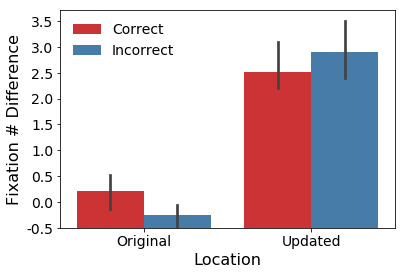

In [232]:
fig,ax = plt.subplots()
sns.barplot(data=fix_diff_tidy, x='loc', y='value', hue='accuracy', palette='Set1', ax=ax)
ax.set_yticklabels(np.arange(-0.5,4.5,.5), fontsize=14)
ax.set_ylabel('Fixation # Difference', fontsize=16)
ax.set_xticklabels(['Original', 'Updated'], fontsize=14)
ax.set_xlabel('Location', fontsize=16)
plt.legend(title="", fontsize=14, frameon=False)
plt.savefig('figs/numfixdiffbarplot.png')

In [234]:
fix_diff

,loc1_Correct_diff,sub,loc1_Incorrect_diff,loc2_Correct_diff,loc2_Incorrect_diff
0,1.238095,ec105,0.238095,2.738095,2.809524
1,0.040000,ec106,0.538462,2.680000,3.461538
2,0.808511,ec107,0.352941,4.127660,4.588235
3,0.854167,ec108,0.375000,2.875000,2.750000
4,0.615385,ec109,-0.240000,2.692308,3.360000


In [ ]:
mm_loc1loc2 = sub_fix_tidy[(sub_fix_tidy['roi']=='loc2start') |
                           (sub_fix_tidy['roi']=='loc1start')]
mm_loc1loc2 = mm_loc1loc2[mm_loc1loc2['cond']==1]

In [35]:
x = AnovaRM(mm_loc1loc2, 'roi_num_mean', 'sub', within=['accuracy', 'roi'])
tab = AnovaRM.fit(x)
print(tab)

                  Anova
             F Value Num DF Den DF Pr > F
-----------------------------------------
accuracy      0.7724 1.0000 4.0000 0.4291
roi          79.2255 1.0000 4.0000 0.0009
accuracy:roi 12.8443 1.0000 4.0000 0.0231



In [36]:
stats.ttest_rel(mm_loc1_cor['roi_num_mean'], mm_loc1_inc['roi_num_mean'])

Ttest_relResult(statistic=1.4809731650996363, pvalue=0.21272976052646667)

In [37]:
stats.ttest_rel(mm_loc2_cor['roi_num_mean'], mm_loc2_inc['roi_num_mean'])

Ttest_relResult(statistic=-5.7268799763380125, pvalue=0.004602369175076197)

In [61]:
mm_loc1_cor

,accuracy,cond,roi,roi_dur_mean,roi_num_mean,roi_prop_mean,sub
0,Correct,1.0,loc1start,825.000000,1.666667,0.186548,ec105
8,Correct,1.0,loc1start,335.680000,1.000000,0.076659,ec106
16,Correct,1.0,loc1start,546.553191,2.127660,0.130936,ec107
24,Correct,1.0,loc1start,772.791667,2.562500,0.190560,ec108
32,Correct,1.0,loc1start,867.179487,3.128205,0.205734,ec109


TypeError: inner() got multiple values for argument 'ax'

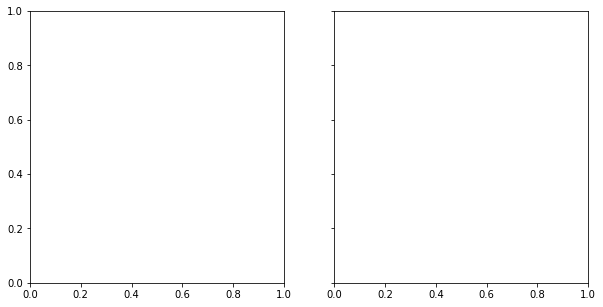

In [119]:
subs=['ec105', 'ec106', 'ec107', 'ec108', 'ec109']
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10,5))
locs = ['loc1start', 'loc2start']
# for sub in subs:
for i,ax in enumerate(fig.axes):
    data = mm_loc1loc2[(mm_loc1loc2['cond']==1) & (mm_loc1loc2['sub']==sub) & (mm_loc1loc2['roi']==loc)]
    #     sns.lineplot(x="accuracy", y="roi_num_mean", data=data, palette="Set1")
    plt.plot(data['accuracy'], data['roi_num_mean'], ax=ax)

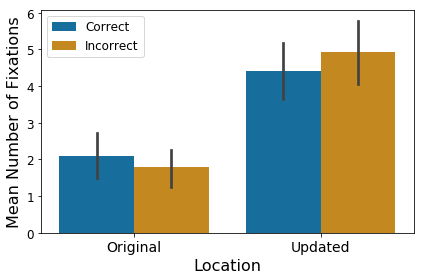

In [53]:
fig, ax = plt.subplots()
yticks = list(range(0,7))
sns.barplot(x="roi", y="roi_num_mean", hue='accuracy', data=mm_loc1loc2, palette="Set1", ax=ax)
ax.set_xticklabels(['Original', 'Updated'], fontsize=14)
ax.set_yticklabels(yticks, fontsize=12)
ax.set_ylabel('Mean Number of Fixations', fontsize=16)
ax.set_xlabel('Location', fontsize=16)
plt.legend(title='', fontsize=12)
plt.tight_layout()
plt.savefig('figs/numfix_accuracy.png')

In [3]:
sublist=['ec105', 'ec106', 'ec107', 'ec108', 'ec109']
# sublist=['ec108']

all_behave=pd.DataFrame()
for sub in sublist:
    file='data/' + sub + 'behave.csv'
    print(file)
    behave=pd.read_csv(file, index_col=0)
    behave['sub']=sub
    all_behave=pd.concat([all_behave,behave])
all_behave=all_behave[all_behave['recog loc']!=-1]

data/ec105behave.csv
data/ec106behave.csv
data/ec107behave.csv
data/ec108behave.csv
data/ec109behave.csv


In [4]:
locs=[1, 2, 3]
recog_prop_dict={}
recog_prop_list=[]
for row, ldf in all_behave.groupby(['sub', 'cond']):
    for loc in locs:
        loc_ldf = ldf[ldf['recog loc']==loc]
        loc_prop = loc_ldf['recog loc'].count()/ldf.shape[0]
           
        recog_prop_dict = {'sub':row[0], 'cond':row[1], 'recog loc':loc, 'loc_prop':loc_prop}
        recog_prop_list.append(recog_prop_dict)
recog_prop_df=pd.DataFrame(recog_prop_list)

In [5]:
recog_prop_df.rename(columns={'recog loc':'recog_loc'}, inplace=True)

In [6]:
mismatch_recog = recog_prop_df[recog_prop_df['cond']==1]
mismatch_recog.drop(columns='cond', inplace=True)
df2 = pd.pivot_table(mismatch_recog, values='loc_prop', columns=['recog_loc'], index='sub')
mm_recog=pd.DataFrame()
mm_recog['loc1'] = df2[1]-df2[3]
mm_recog['loc2'] = df2[2]-df2[3]

/Users/drdj/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [95]:
stats.ttest_1samp(mm_recog['loc1'],0)

Ttest_1sampResult(statistic=7.199921899057908, pvalue=0.0019722170346913575)

In [96]:
stats.ttest_1samp(mm_recog['loc2'],0)

Ttest_1sampResult(statistic=3.804874694176799, pvalue=0.01902374038689301)

In [84]:
mm_recog.reset_index(inplace=True)

In [92]:
mm_recog_tidy = mm_recog.melt(id_vars=['sub'], value_vars=['loc1', 'loc2'], value_name="prop_recog")

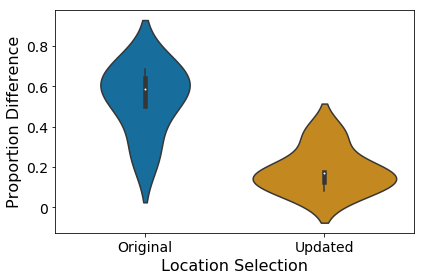

In [105]:
fig,ax=plt.subplots()
sns.violinplot(data=mm_recog_tidy, x='variable', y='prop_recog', palette='colorblind',ax=ax)
ax.set_xticklabels(['Original', 'Updated'], fontsize=14)
ax.set_xlabel('Location Selection', fontsize=16)

ax.set_yticklabels([0,0,.2,.4,.6,.8,1],fontsize=14)

ax.set_ylabel('Proportion Difference', fontsize=16)
plt.tight_layout()

plt.savefig('figs/recog_behave_vio_mismatch_propdiff.png')

In [9]:
stats.ttest_rel(mm_recog['loc1'], mm_recog['loc2'])

Ttest_relResult(statistic=2.9354763134477158, pvalue=0.04258063291873199)

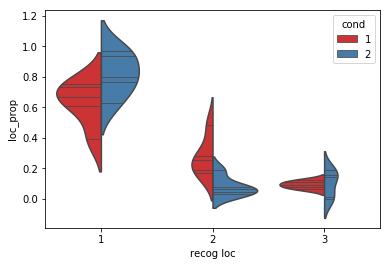

In [13]:
sns.violinplot(x="recog loc", y="loc_prop", hue='cond', data=recog_prop_df, 
               split=True, inner="stick", palette="Set1")

(0, 1)

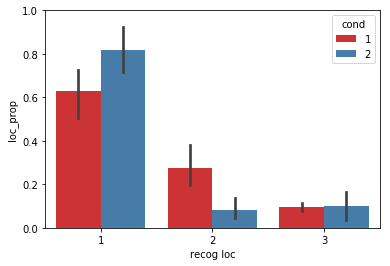

In [14]:
sns.barplot(x="recog loc", y="loc_prop", hue='cond', data=recog_prop_df, palette="Set1")
plt.ylim([0,1])

In [51]:
recog_prop_df.rename(columns={'recog loc':'recog_loc'}, inplace=True)
recog_prop_df['loc_prop_expit']=scipy.special.expit(recog_prop_df['loc_prop'])


In [53]:
x = AnovaRM(recog_prop_df, 'loc_prop_expit', 'sub', within=['cond', 'recog_loc'])
tab = AnovaRM.fit(x)
print(tab)

                   Anova
               F Value Num DF Den DF Pr > F
-------------------------------------------
cond           13.8180 1.0000 4.0000 0.0205
recog_loc      39.0813 2.0000 8.0000 0.0001
cond:recog_loc 30.2712 2.0000 8.0000 0.0002



In [46]:
yticks = np.arange(0,1.2,.2)
yticks

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

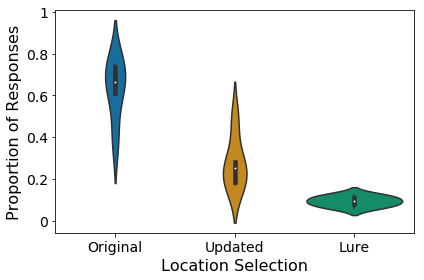

In [52]:
fig,ax = plt.subplots()
yticks = list(range(0,1))
sns.violinplot(x="recog_loc", y="loc_prop", data=recog_prop_df[recog_prop_df['cond']==1], palette="colorblind", ax=ax)
ax.set_xticklabels(['Original', 'Updated', 'Lure'], fontsize=14)
ax.set_xlabel('Location Selection', fontsize=16)

ax.set_yticklabels([0,0,.2,.4,.6,.8,1],fontsize=14)

ax.set_ylabel('Proportion of Responses', fontsize=16)
plt.tight_layout()
plt.savefig('figs/recog_behave_viostrip_mismatch.png')
# ax = sns.stripplot(x="recog_loc", y="loc_prop", data=recog_prop_df[recog_prop_df['cond']==1], color='.2')
# plt.savefig('figs/recog_behave_viostrip_mismatch.eps', format='eps', dpi=1000)


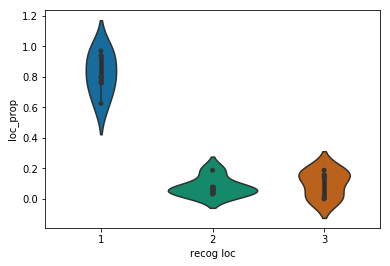

In [28]:
ax = sns.violinplot(x="recog loc", y="loc_prop", data=recog_prop_df[recog_prop_df['cond']==2], palette="colorblind")
ax = sns.stripplot(x="recog loc", y="loc_prop", data=recog_prop_df[recog_prop_df['cond']==2], color='.2')
plt.savefig('figs/recog_behave_viostrip_match.eps', format='eps', dpi=1000)

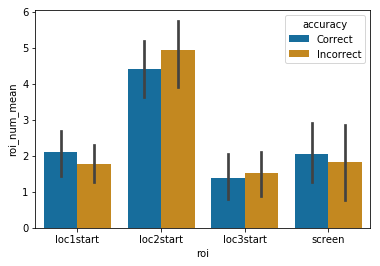

In [137]:
sns.barplot(x='roi', y='roi_num_mean', data=sub_fix_tidy[sub_fix_tidy['cond']==1], hue='accuracy', 
            palette='colorblind')

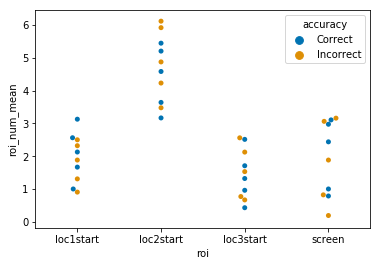

In [138]:
sns.swarmplot(x="roi", y="roi_num_mean", hue='accuracy', data=sub_fix_tidy[sub_fix_tidy['cond']==1], 
               palette="colorblind")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


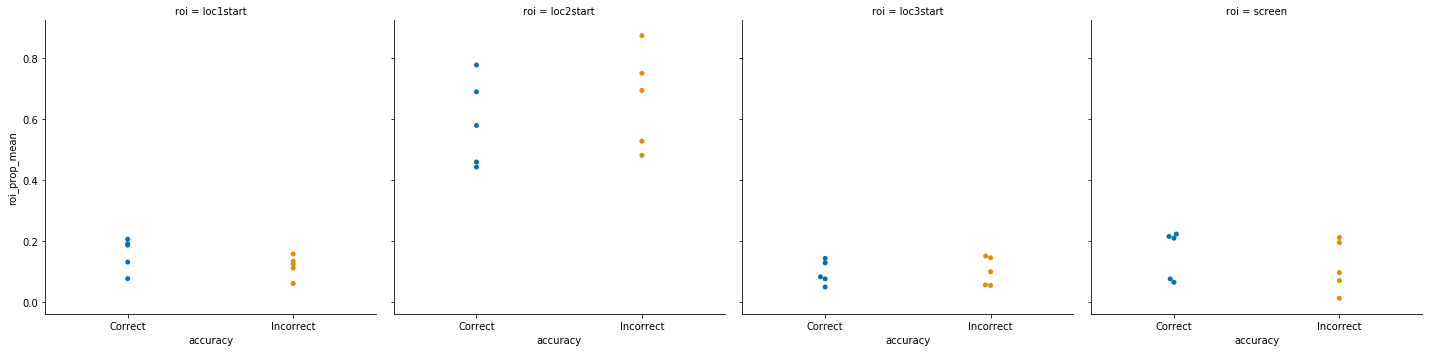

In [139]:
sns.factorplot(x="accuracy", y="roi_prop_mean", col="roi", 
               data=sub_fix_tidy[sub_fix_tidy['cond']==1], kind="swarm", palette='colorblind');

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


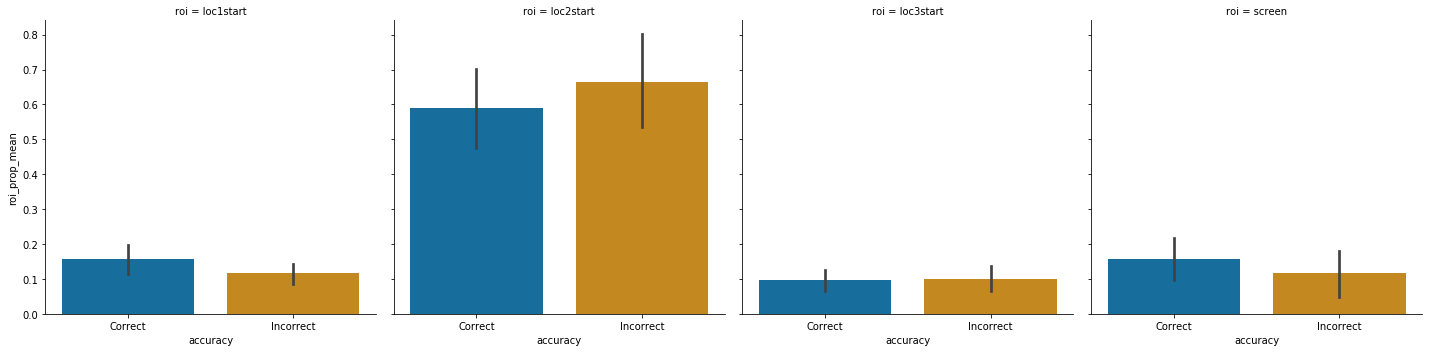

In [140]:
sns.factorplot(x="accuracy", y="roi_prop_mean", col="roi", data=sub_fix_tidy[sub_fix_tidy['cond']==1], 
               kind="bar", palette='colorblind');

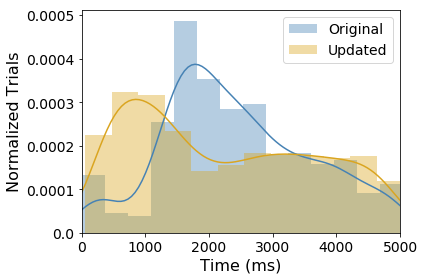

In [134]:
sacc = all[all['event'] == 'ESACC']

sacc_mismatch = sacc[sacc['cond']==1]
sacc_legend=['Original', 'Updated']
condlist=['loc1start', 'loc2start']
color_list = ['steelblue', 'goldenrod']
def make_layered_hist(array, condlist, legendlist, colorlist):
    
    fig, ax = plt.subplots()
    for cond,label,color in zip(condlist,legendlist,colorlist):
        data=array[array['startloc']==cond]
        kde=sns.distplot(data['start'], ax=ax, label=label, color=color)
        ax.legend(fontsize=14)
    ax.set_xlabel('Time (ms)', fontsize=16)
    ax.set_xlim([0,5000])
    ax.set_ylabel('Normalized Trials', fontsize=16)
    ax.set_xticklabels(list(range(0,6000,1000)), fontsize=14)
    ax.set_yticklabels([0.0000, .0001, .0002, .0003, .0004, .0005], fontsize=14)

    plt.tight_layout()    
    plt.show()
    kde=kde.get_figure()
    kde.savefig('figs/ls_kde_mismatch.png')

make_layered_hist(sacc_mismatch, condlist, sacc_legend, color_list)

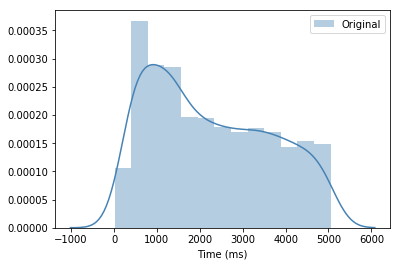

In [43]:
sacc_match = sacc[sacc['cond']==2]
sacc_legend=['Original']
condlist=['loc1start', ]
color_list = ['steelblue',]
make_layered_hist(sacc_match, condlist, sacc_legend, color_list)

<IPython.core.display.Javascript object>


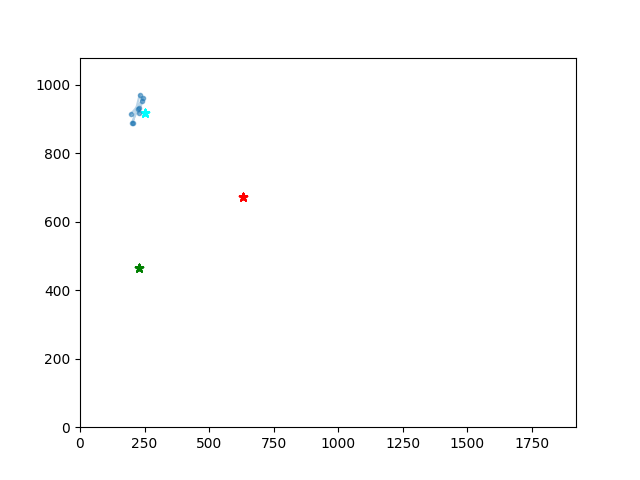

(0, 1080)

In [178]:
sub='ec108'
subdf=all[(all['sub']==sub) & (all['refresh order']==74) ]
study=subdf.copy()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(subdf.xstart, subdf.ystart, marker='.', alpha=0.3)
ax.plot(subdf.xstart, subdf.ystart, marker='.', alpha=0.3)
ax.scatter(subdf.loc1x, subdf.loc1y, marker='*', c='cyan')
ax.scatter(subdf.loc2x, subdf.loc2y, marker='*', c='red')
ax.scatter(subdf.loc3x, subdf.loc3y, marker='*', c='green')
plt.xlim(0, 1920)
plt.ylim(0, 1080)
# plt.savefig('figs/eye_path_ec108_tr30_recog.eps', format='eps', dpi=1000)

In [11]:
from imageio import imread
import matplotlib.animation as animation

apple = imread('figs/apple.png')
grid = imread('figs/grid.png')
apple2 = apple[::-1]

# apple_trans = imread('apple_trans.png')
# apple2_trans = apple_trans[::-1]


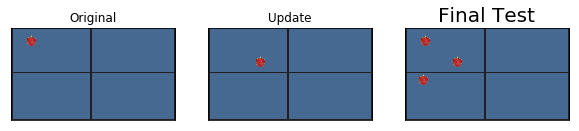

In [23]:
fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(1,3,1, aspect=1080/1920)
ax2 = fig.add_subplot(1,3,2, aspect=1080/1920)
ax3 = fig.add_subplot(1,3,3, aspect=1080/1920)


ax1.set_xlim(0, 1920)
ax1.set_ylim(0, 1080)
ax1.set_title('Original')
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax2.set_xlim(0, 1920)
ax2.set_ylim(0, 1080)
ax2.set_title('Update')
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

ax3.set_xlim(0, 1920)
ax3.set_ylim(0, 1080)
ax3.set_title('Final Test', fontsize=20)
ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)

offset = 120


# for plotting apple
def coords_to_borders(subdf, loc, offset):
    xi = subdf[f'loc{loc}x'].iloc[0]
    yi = subdf[f'loc{loc}y'].iloc[0]
    return [xi-offset, xi+offset, yi+offset, yi-offset]

loc1_coords = coords_to_borders(refresh, loc=1, offset=offset)
loc2_coords = coords_to_borders(refresh, loc=2, offset=offset)
loc3_coords = coords_to_borders(refresh, loc=3, offset=offset)

# plot grid
ax1.imshow(grid, extent = [0, 1920, 0, 1080])
ax2.imshow(grid, extent = [0, 1920, 0, 1080])
ax3.imshow(grid, extent = [0, 1920, 0, 1080])

#plot apple
# study
ax1.imshow(apple2, extent = loc1_coords)
# refresh
ax2.imshow(apple2, extent = loc2_coords )
# ax2.imshow(apple2_trans, extent = loc1_coords)
# recog
ax3.imshow(apple2, extent = loc1_coords )
ax3.imshow(apple2, extent = loc2_coords )
ax3.imshow(apple2, extent = loc3_coords )

x_stu=study['xstart']
y_stu=study['ystart']
nstupoints = len(y_stu)


x_ref=refresh['xstart']
y_ref=refresh['ystart']
nrefpoints = len(y_ref)

x_rec=recog['xstart']
y_rec=recog['ystart']
nrecpoints = len(y_rec)

# x_stu = x_stu.append(x_stu)
# x_stu = x_stu.append(x_stu)
# y_stu = y_stu.append(y_stu)
# y_stu = y_stu.append(y_stu)
# print(nrefpoints, nstupoints)


l_stu, = ax1.plot([], [], 'w-', alpha=0.5)
dot_stu, = ax1.plot([], [], 'wo', alpha=.5)

l_ref, = ax2.plot([], [], 'w-', alpha=0.5)
dot_ref, = ax2.plot([], [], 'wo', alpha=.5)

l_rec, = ax3.plot([], [], 'w-', alpha=0.5)
dot_rec, = ax3.plot([], [], 'wo', alpha=.5)

def update_line(num, x,y, line, dot):
    i = num
    if num > len(x):
        i = len(x)
    line.set_data(x[:i], y[:i])
    dot.set_data(x[i-1:i], y[i-1:i])
    return line, dot,

def update_lines(num, x_stu, y_stu, x_ref, y_ref, x_rec, y_rec, l_stu, dot_stu, l_ref, dot_ref, l_rec, dot_rec ):
    a = update_line(num, x=x_stu, y=y_stu, line=l_stu, dot=dot_stu)
    b = update_line(num, x=x_ref, y=y_ref, line=l_ref, dot=dot_ref)
    c = update_line(num, x=x_rec, y=y_rec, line=l_rec, dot=dot_rec)
    return a + b + c
    
line_ani = animation.FuncAnimation(fig, update_lines, nrecpoints, 
                                   fargs=(x_stu, y_stu, x_ref, y_ref, x_rec, y_rec, l_stu, 
                                          dot_stu, l_ref, dot_ref, l_rec, dot_rec), interval=200, blit=True)


28 9


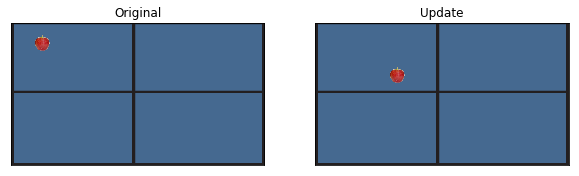

In [12]:
fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(1,2,1, aspect=1080/1920)
ax2 = fig.add_subplot(1,2,2, aspect=1080/1920)

ax1.set_xlim(0, 1920)
ax1.set_ylim(0, 1080)
ax2.set_xlim(0, 1920)
ax2.set_ylim(0, 1080)



ax1.set_xlim(0, 1920)
ax1.set_ylim(0, 1080)
ax2.set_xlim(0, 1920)
ax2.set_ylim(0, 1080)
ax1.set_title('Original')
ax2.set_title('Update')
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
offset = 120


# loc1 = {key: subdf[f'loc1{key}'].iloc[0] for key in ['x', 'y']}
# loc2 = {key: subdf[f'loc2{key}'].iloc[0] for key in ['x', 'y']}

# loc1_coords = [loc1['x']-offset, loc1['x']+offset, loc1['y']+offset, loc1['y']-offset]
# loc2_coords = [loc2['x']-offset, loc2['x']+offset, loc2['y']+offset, loc2['y']-offset]


# for plotting apple
def coords_to_borders(subdf, loc, offset):
    xi = subdf[f'loc{loc}x'].iloc[0]
    yi = subdf[f'loc{loc}y'].iloc[0]
    return [xi-offset, xi+offset, yi+offset, yi-offset]

loc1_coords = coords_to_borders(refresh, loc=1, offset=offset)
loc2_coords = coords_to_borders(refresh, loc=2, offset=offset)

# plot grid
ax1.imshow(grid, extent = [0, 1920, 0, 1080])
ax2.imshow(grid, extent = [0, 1920, 0, 1080])

#plot apple
# study
ax1.imshow(apple2, extent = loc1_coords)
# refresh
ax2.imshow(apple2, extent = loc2_coords )
# ax2.imshow(apple2_trans, extent = loc1_coords)


x_stu=study['xstart']
y_stu=study['ystart']
nstupoints = len(y_stu)


x_ref=refresh['xstart']
y_ref=refresh['ystart']
nrefpoints = len(y_ref)


# extra_points = nrefpoints - nstupoints
x_stu = x_stu.append(x_stu)
x_stu = x_stu.append(x_stu)
y_stu = y_stu.append(y_stu)
y_stu = y_stu.append(y_stu)
print(nrefpoints, nstupoints)


l_stu, = ax1.plot([], [], 'w-', alpha=0.5)
dot_stu, = ax1.plot([], [], 'wo', alpha=.5)

l_ref, = ax2.plot([], [], 'w-', alpha=0.5)
dot_ref, = ax2.plot([], [], 'wo', alpha=.5)

def update_line(num, x,y, line, dot):
    i = num
    if num > len(x):
        i = len(x)
    line.set_data(x[:i], y[:i])
    dot.set_data(x[i-1:i], y[i-1:i])
    return line, dot,

def update_lines(num, x_stu, y_stu, x_ref, y_ref, l_stu, dot_stu, l_ref, dot_ref ):
    a = update_line(num, x=x_stu, y=y_stu, line=l_stu, dot=dot_stu)
    b = update_line(num, x=x_ref, y=y_ref, line=l_ref, dot=dot_ref)
    return a+ b
    
line_ani = animation.FuncAnimation(fig, update_lines, nrefpoints, fargs=(x_stu, y_stu, x_ref, y_ref, l_stu, dot_stu, l_ref, dot_ref),
                                   interval=200, blit=True)


<IPython.core.display.Javascript object>


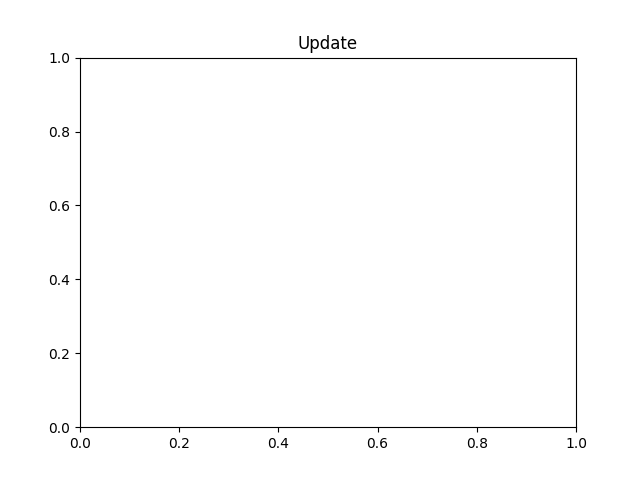

/Users/drdj/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/drdj/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [177]:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def update_line(num, x,y, line, dot):
    line.set_data(x[:num], y[:num])
    dot.set_data(x[num-1:num], y[num-1:num])
    return line, dot,

fig1 = plt.figure()
ax1 = fig.add_subplot(1,2,1, aspect=1080/1920)

x=subdf['xstart']
y=subdf['ystart']
npoints = len(y)

# ax.scatter(subdf.loc1x, subdf.loc1y, marker='*', c='cyan')
# ax.scatter(subdf.loc2x, subdf.loc2y, marker='*', c='red')
# ax.scatter(subdf.loc3x, subdf.loc3y, marker='*', c='green')

l, = ax1.plot([], [], 'w-', alpha=0.5)
dot, = ax1.plot([], [], 'wo')

ax1.set_xlim(0, 1920)
ax1.set_ylim(0, 1080)
# plt.xlabel('x')
plt.title('Update')

offset = 120


loc1 = {key: subdf[f'loc1{key}'].iloc[0] for key in ['x', 'y']}
loc2 = {key: subdf[f'loc2{key}'].iloc[0] for key in ['x', 'y']}

loc1_coords = [loc1['x']-offset, loc1['x']+offset, loc1['y']+offset, loc1['y']-offset]
loc2_coords = [loc2['x']-offset, loc2['x']+offset, loc2['y']+offset, loc2['y']-offset]


ax1.imshow(grid, extent = [0, 1920, 0, 1080])

ax1.imshow(apple2, extent = loc2_coords )
ax1.imshow(apple2_trans, extent = loc1_coords)


ax2 = fig.add_subplot(1,2,2, aspect=1080/1920)

line_ani = animation.FuncAnimation(fig1, update_line, npoints, fargs=(x, y, l, dot),
                                   interval=200, blit=True)
# line_ani.save('figs/eyepath.mp4', writer=writer)

plt.show()

In [19]:
maxpoints = max([nstupoints, nrefpoints, nrecpoints])
maxpoints

28

In [20]:
nrecpoints

28